In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
%matplotlib inline
import seaborn as sns
import calendar as cal

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.0.15


In [3]:
import cufflinks as cf

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
# Reading the Data and creating different dataframes
elec1 = pd.read_csv("C:\\Users\\Jeet\\Desktop\\Python\\Homework\\Assignment 1\\all_house_senate_2010.csv", encoding = 'ISO-8859-1', low_memory = False)
elec2 = pd.read_csv("C:\\Users\\Jeet\\Desktop\\Python\\Homework\\Assignment 1\\all_house_senate_2012.csv", encoding = 'ISO-8859-1', low_memory = False)
elec4 = pd.read_csv("C:\\Users\\Jeet\\Desktop\\Python\\Homework\\Assignment 1\\all_house_senate_2014.csv", encoding = 'ISO-8859-1', low_memory = False)
elec6 = pd.read_csv("C:\\Users\\Jeet\\Desktop\\Python\\Homework\\Assignment 1\\all_house_senate_2016.csv", encoding = 'ISO-8859-1', low_memory = False)

In [7]:
# Concatenating the dataframes to combine the data
combine = [elec1, elec2, elec4, elec6]
elec = pd.concat(combine)

In [8]:
# To view the data
elec.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,064608708,2010-04-01,$254.40,POSTAGE MACHINE LEASE,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25707,NaN
1,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,193439533,2010-04-01,"$1,650.00",OFFICE RENT,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25700,NaN
2,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,070541867,2010-09-13,"$3,140.00",ADVERTISING: WEB ADVERTISING,NaN,NaN,004,Advertising Expenses,B-E-27437,NaN
3,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,150908655,2010-09-13,"$2,305.00",FUNDRAISING: FUNDRAISING COMMISSION,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-27443,NaN
4,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,152507461,2010-09-13,$44.72,OVERNIGHT MAIL,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-27432,NaN


In [9]:
# Removing the '$' Sign from the Disbursment Amount and converting it to float
elec['dis_amo'] = elec['dis_amo'].str.replace(',', '')
elec['dis_amo'] = elec['dis_amo'].str.replace('$', '')
elec['dis_amo'] = elec['dis_amo'].astype(float)

In [10]:
# Performing Data Cleaning to Remove Missing Values

# Removing the missing values from 'can_off_dis'
elec.dropna(subset = ['can_off_dis'], how = 'all', inplace = True)

# Removing the missing values from 'dis_dat'
elec.dropna(subset = ['dis_dat'], how = 'all', inplace = True)

# Filling missing values from dis_amo
elec['dis_amo'].fillna(elec['dis_amo'].mean(), inplace = True)

# remove missing values from lin_num
elec.dropna(subset = ['lin_num'], how = 'all', inplace = True)

In [11]:
# Checking the Columns present after dropping
elec.columns

Index(['com_id', 'com_nam', 'can_id', 'can_nam', 'ele_yea', 'can_off',
       'can_off_sta', 'can_off_dis', 'lin_num', 'lin_ima', 'rec_com_id',
       'rec_nam', 'rec_str1', 'rec_str2', 'rec_cit', 'rec_sta', 'rec_zip',
       'dis_dat', 'dis_amo', 'dis_pur_des', 'mem_cod', 'mem_tex', 'cat_cod',
       'cat_des', 'tra_id', 'bac_ref_id'],
      dtype='object')

In [12]:
# Checking for any Null data
elec.isnull().any()

com_id         False
com_nam        False
can_id         False
can_nam        False
ele_yea        False
can_off        False
can_off_sta    False
can_off_dis    False
lin_num        False
lin_ima        False
rec_com_id      True
rec_nam         True
rec_str1        True
rec_str2        True
rec_cit         True
rec_sta         True
rec_zip         True
dis_dat        False
dis_amo        False
dis_pur_des     True
mem_cod         True
mem_tex         True
cat_cod         True
cat_des         True
tra_id          True
bac_ref_id      True
dtype: bool

In [13]:
# Dropping the columns
elec.drop('rec_com_id', axis = 1, inplace = True)
elec.drop('rec_str1', axis = 1, inplace = True)
elec.drop('rec_str2', axis = 1, inplace = True)
elec.drop('mem_cod', axis = 1, inplace = True)
elec.drop('mem_tex', axis = 1, inplace = True)
elec.drop('com_id', axis = 1, inplace = True)
elec.drop('can_id', axis = 1, inplace = True)
elec.drop('lin_ima', axis = 1, inplace = True)
elec.drop('lin_num', axis = 1, inplace = True)
elec.drop('bac_ref_id', axis = 1, inplace = True)

In [14]:
# Filling the missing values
elec['rec_sta'].fillna('UNKNOWN', inplace = True)
elec['rec_cit'].fillna('UNKNOWN', inplace = True)
elec['rec_zip'].fillna('UNKNOWN', inplace = True)
elec['dis_pur_des'].fillna('UNKNOWN', inplace = True)
elec['cat_cod'].fillna('UNKNOWN', inplace = True)
elec['cat_des'].fillna('UNKNOWN', inplace = True)
elec['rec_nam'].fillna('UNKNOWN', inplace = True)

In [15]:
# Displaying the Price
elec['dis_amo']

0          254.40
1         1650.00
2         3140.00
3         2305.00
4           44.72
5           39.01
6          171.98
7           43.88
8           52.03
9           32.01
10          47.64
11         447.46
12         321.70
13         923.08
14        1152.22
15         401.11
16        1391.70
17         112.20
18         370.46
19        3667.50
20          41.54
21        1680.00
22          45.90
23        4492.10
24        3000.00
25          44.00
26         339.97
27          23.26
28          22.00
29         550.00
           ...   
797849     295.00
797850    7500.00
797851     259.00
797852      48.86
797853       7.95
797854     192.90
797855      38.99
797856      28.62
797857     876.80
797858       1.15
797859       5.70
797860      49.05
797861       5.67
797862       8.63
797863    1780.34
797864     900.00
797865    2000.00
797866     249.13
797867     183.77
797868     375.00
797869    6000.00
797870     902.31
797871     453.73
797872     311.07
797873    

In [16]:
# Viewing the dataset after manipulation
elec.head()

,com_nam,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,rec_nam,rec_cit,rec_sta,rec_zip,dis_dat,dis_amo,dis_pur_des,cat_cod,cat_des,tra_id
0,JIM GERLACH FOR CONGRESS COMMITTEE,"GERLACH, JIM",2010,H,PA,6.0,"HASLER, INC",MILFORD,CT,064608708,2010-04-01,254.40,POSTAGE MACHINE LEASE,001,Administrative/Salary/Overhead Expenses,B-E-25707
1,JIM GERLACH FOR CONGRESS COMMITTEE,"GERLACH, JIM",2010,H,PA,6.0,"MACKEY, JOHN C",GLENMOORE,PA,193439533,2010-04-01,1650.00,OFFICE RENT,001,Administrative/Salary/Overhead Expenses,B-E-25700
2,JIM GERLACH FOR CONGRESS COMMITTEE,"GERLACH, JIM",2010,H,PA,6.0,CAMPBELL CAMPAIGNS,PARSIPPANY,NJ,070541867,2010-09-13,3140.00,ADVERTISING: WEB ADVERTISING,004,Advertising Expenses,B-E-27437
3,JIM GERLACH FOR CONGRESS COMMITTEE,"GERLACH, JIM",2010,H,PA,6.0,DEVANNEY GROUP LLC,WEXFORD,PA,150908655,2010-09-13,2305.00,FUNDRAISING: FUNDRAISING COMMISSION,003,Solicitation and Fundraising Expenses,B-E-27443
4,JIM GERLACH FOR CONGRESS COMMITTEE,"GERLACH, JIM",2010,H,PA,6.0,FEDEX,PITTSBURGH,PA,152507461,2010-09-13,44.72,OVERNIGHT MAIL,001,Administrative/Salary/Overhead Expenses,B-E-27432


In [17]:
# Checking the type pf data present in columns
elec.dtypes

com_nam         object
can_nam         object
ele_yea          int64
can_off         object
can_off_sta     object
can_off_dis    float64
rec_nam         object
rec_cit         object
rec_sta         object
rec_zip         object
dis_dat         object
dis_amo        float64
dis_pur_des     object
cat_cod         object
cat_des         object
tra_id          object
dtype: object

In [18]:
# Seperating the Date into Years, Months and Days

elec['date'] = elec['dis_dat'].astype('datetime64[ns]')
elec['date'] = pd.to_datetime(elec['date'])
elec['year'] = elec['date'].dt.year
elec['month'] = elec['date'].dt.month
elec['day'] = elec['date'].dt.day

In [19]:
elec['month'] = elec['month'].apply(lambda x: cal.month_abbr[x])

In [20]:
# Splitting the Amount into Positive and Negative

mask = elec['dis_amo'] < 0
elec['pos_amo'] = elec['dis_amo'].mask(mask)
elec['neg_amo'] = elec['dis_amo'].mask(~mask)
elec['pos_amo'].fillna(0, inplace=True)
elec['neg_amo'].fillna(0, inplace=True)

BAR PLOT

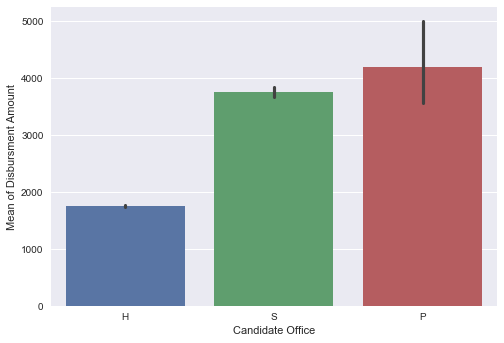

In [21]:
ax = sns.barplot(x = 'can_off', y = 'pos_amo', data = elec)

# Changing the labels for X and Y Axis
ax.set(xlabel = 'Candidate Office', ylabel = 'Mean of Disbursment Amount')

LINE GRAPH

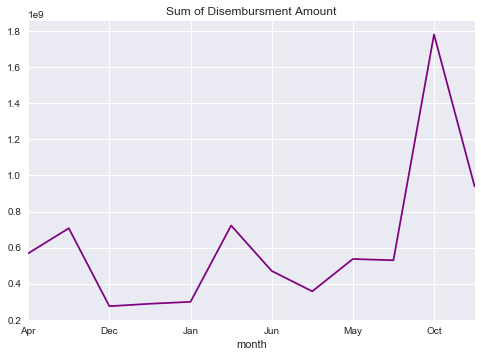

In [22]:
plt = elec.groupby('month')['pos_amo'].sum()
plt.plot(kind = 'line', title='Sum of Disembursment Amount', color = 'purple')

COUNT PLOT

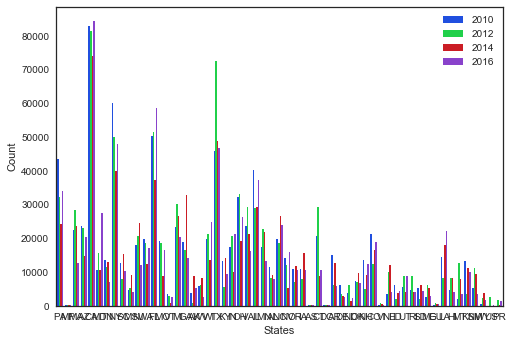

In [23]:
# Changing the canvas size and formatting
#sns.fig = plt.figure(figsize = (5,25))
sns.set_style('white')
#sns.set_context('poster', font_scale = 1)

# Counting the number of records against the states
ax = sns.countplot(x = 'can_off_sta', data = elec, palette = 'bright', hue = 'ele_yea')

# Changing the labels for X and Y Axis
ax.set(ylabel = 'Count', xlabel = 'States')

# Setting the position of Legend
ax.legend(loc = 1)

HISTOGRAM

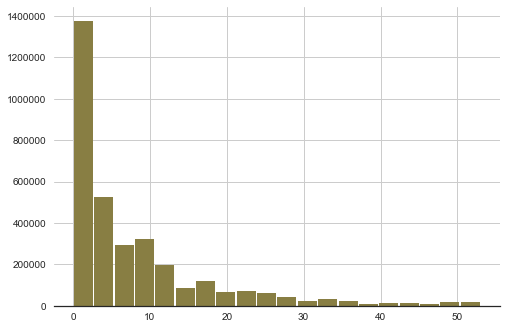

In [24]:
elec['can_off_dis'].hist(bins = 20, facecolor = '#887E43', histtype = 'bar', rwidth = 0.93)
#plt.xlabel('Candidate Office District (Bins)')
#plt.ylabel('Count of Candidate Office Districts')
#plt.axis([0,56,0,550000])
sns.despine(left = True)
#plt.grid(True)

In [25]:
# Forming a Correlation matrix for the dataset
elec.corr()

,ele_yea,can_off_dis,dis_amo,year,day,pos_amo,neg_amo
ele_yea,1.000000,0.016728,0.000746,0.959406,0.000411,0.000738,0.000514
can_off_dis,0.016728,1.000000,-0.014952,0.013543,0.010914,-0.014958,0.000288
dis_amo,0.000746,-0.014952,1.000000,0.006205,0.004503,0.999883,0.016014
year,0.959406,0.013543,0.006205,1.000000,0.000972,0.006200,0.000354
day,0.000411,0.010914,0.004503,0.000972,1.000000,0.004522,-0.001200
pos_amo,0.000738,-0.014958,0.999883,0.006200,0.004522,1.000000,0.000737
neg_amo,0.000514,0.000288,0.016014,0.000354,-0.001200,0.000737,1.000000


HEATMAP

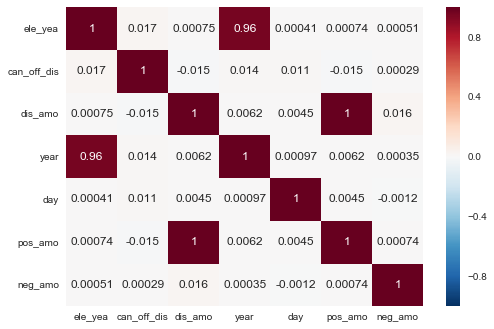

In [26]:
sns.heatmap(elec.corr(), annot = True)

STRIP PLOT

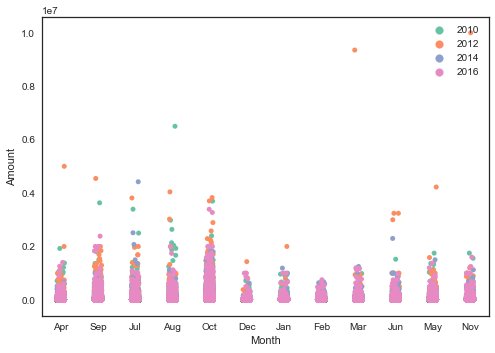

In [27]:
#sns.fig = plt.figure(figsize = (25,5))
sns.set_style('white')
ax = sns.stripplot(x = elec['month'], y = 'pos_amo', hue = 'ele_yea', jitter = True, data = elec, palette = 'Set2')
# Setting the position of Legend
ax.legend(loc = 1)
ax.set(xlabel = 'Month', ylabel = 'Amount')
#ax.set_ylim([0, 6000000])

VIOLIN PLOT

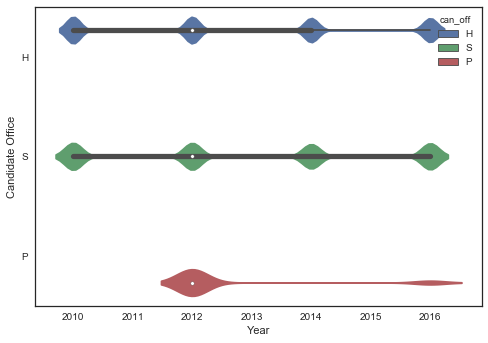

In [28]:
ax = sns.violinplot(x = elec['ele_yea'], y = 'can_off', data =elec, hue='can_off')
ax.set(xlabel = 'Year', ylabel = 'Candidate Office')

In [29]:
elec_data = elec.pivot_table(values = 'dis_amo', index = 'month', columns = 'ele_yea')
elec_data

ele_yea,2010,2012,2014,2016
month,,,,
Apr,1958.496877,2002.021094,2040.158939,1968.973913
Aug,2432.421927,2300.386349,1931.511110,2405.320211
Dec,1326.295592,1351.425261,1325.619188,1522.980157
Feb,1294.569325,1323.119549,1597.884322,1618.483125
Jan,1644.050300,1435.872231,1553.955558,1594.170962
Jul,1982.299069,2410.473712,2196.742033,2225.296492
Jun,1478.970824,1699.847728,1776.788063,1685.178194
Mar,1362.285714,1577.594348,1461.372608,1695.557192
May,1786.818488,1986.683725,1885.518967,1875.171003


CLUSTER MAP

C:\Users\Jeet\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



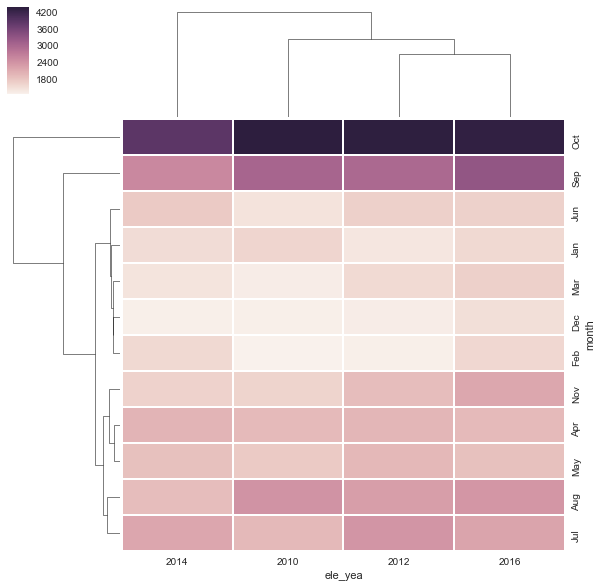

In [30]:
ax = sns.clustermap(elec_data, linecolor = 'white', linewidths = 1)

In [31]:
import plotly.plotly as py 
py.sign_in('jeet08', '6Yn2MPnaWbDwdzBqUehS')
import plotly 
plotly.tools.set_credentials_file(username = 'jeet08', api_key = '6Yn2MPnaWbDwdzBqUehS')

In [32]:
elec_p = elec.groupby(['ele_yea','can_off_sta']).agg({'dis_amo' : 'sum'}).reset_index()

In [33]:
elec_p.head()

,ele_yea,can_off_sta,dis_amo
0,2010,AK,8450930.36
1,2010,AL,17482276.49
2,2010,AR,35426302.71
3,2010,AS,129108.27
4,2010,AZ,59504511.28


CHOROPLETH MAP

In [34]:
# Converting to string
for col in elec_p.columns:
    elec_p[col] = elec_p[col].astype(str)

# Defining colour scale
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# Creating text on hover
elec_p['text'] = 'The amount spent in ' + elec_p['can_off_sta'] + '<br>' + ' in year ' + elec_p['ele_yea'] + ' is ' + elec_p['dis_amo']
    
# Plotting data    
data = [ dict(
         type = 'choropleth',
         colorscale = scl,
         autocolorscale = False,
         locations = elec_p['can_off_sta'],
         z = elec_p['dis_amo'].astype(float),
         locationmode = 'USA-states',
         text = elec_p['text'],
         marker = dict(
         line = dict (
         color = 'rgb(0,0,0)',
         width = 2
                     )
                      ),
         colorbar = dict(
         title = "Amount in Million $")
                )
       ]

# Defining plot properties
layout = dict(
         title = 'Disbursement Amount by States',
         geo = dict(
         scope = 'usa',
         countrycolor = 'rgb(255, 255, 128)',
         countrywidth = 0.1,
         projection = dict( type='albers usa' ),
         showlakes = True,
         lakecolor = 'rgb(128, 64, 64)'),
             )
    
fig = dict(data = data, layout = layout )
py.iplot(fig)

STACKED BAR

In [35]:
elect0 = elec.groupby(['ele_yea','can_off_sta']).agg({'pos_amo' : 'sum'}).reset_index()
elect2 = elec.groupby(['ele_yea','can_off_sta']).agg({'pos_amo' : 'sum'}).reset_index()
elect4 = elec.groupby(['ele_yea','can_off_sta']).agg({'pos_amo' : 'sum'}).reset_index()
elect6 = elec.groupby(['ele_yea','can_off_sta']).agg({'pos_amo' : 'sum'}).reset_index()

In [36]:
import plotly.graph_objs as go
trace1 = go.Bar(
     y = elect0['pos_amo'],
     x = elect0['can_off_sta'],
     name ='2010'
)
trace2 = go.Bar(
    y = elect2['pos_amo'],
    x = elect2['can_off_sta'],
    name ='2012'
)
trace3 = go.Bar(
    y = elect4['pos_amo'],
    x = elect4['can_off_sta'],
    name ='2014'
)
trace4 = go.Bar(
    y = elect6['pos_amo'],
    x = elect6['can_off_sta'],
    name ='2016'
)
data=[trace1,trace2,trace3,trace4]
layout = go.Layout(title = 'Amount Disembursed by States',
                   xaxis = dict(title = 'States'),
                   yaxis = dict(title = 'Amount Disembursed', range=[0,]),
                   barmode='stack'                  
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)